In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data=pd.read_csv('../data/csv/cleaned/ta-citilink-clean.csv')
data.head

<bound method NDFrame.head of                                                   text  label
0    Sangat kecewa utk kemunduran jam kbrgktan mask...      0
1    Cancelled flight, input data whatsapp salah, i...      0
2    Tolong di training lagi itu pramugarinya atas ...      0
3    Seumur hidup cmn pernah beli tiket citilink 2x...      0
4    Jelek banget pelayanannya, sangat sangat kecew...      0
..                                                 ...    ...
487  Luar biasa on time saat keberangkatan dan kepu...      1
488  Citilink, favorit maskapai budget dalam negri ...      1
489  Luar biasa on time saat keberangkatan dan kepu...      1
490  Citilink, favorit maskapai budget dalam negri ...      1
491  Luar biasa on time saat keberangkatan dan kepu...      1

[492 rows x 2 columns]>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    492 non-null    object
 1   label   492 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [6]:
print('Total Data : ',data.shape[0],' Data\n')
print('Terdiri Dari (Label) : ')
print('[0] Sentimen Negatif\t\t\t:',data[data.label==0].shape[0],' data')
print('[1] Sentimen Positif\t\t\t:',data[data.label==1].shape[0],' data')

Total Data :  492  Data

Terdiri Dari (Label) : 
[0] Sentimen Negatif			: 35  data
[1] Sentimen Positif			: 457  data


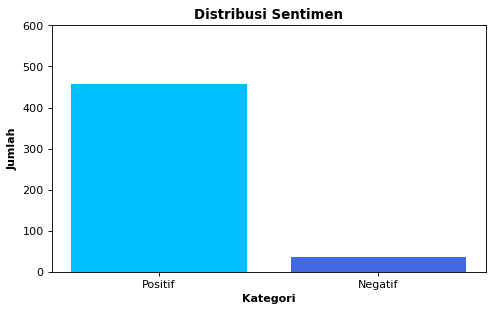

In [7]:
height=data['label'].value_counts()
labels=('Positif','Negatif')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Sentimen',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show()

In [8]:
import re

#Create function for case folding sequence
def casefolding(text):
  text=text.lower()
  text=re.sub(r'https?://\S+|www\.\S+','',text)
  text=re.sub(r'[-+]?[0-9]+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=text.strip()
  return text

In [9]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)

Raw Data	:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case Folding	:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa


In [10]:
key_norm=pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text=' '.join([key_norm[key_norm['singkat']==word]['hasil'].values[0]if(key_norm['singkat']==word).any()else word for word in text.split()])
  text=str.lower(text)
  return text

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind=stopwords.words('indonesian')

In [12]:
len(stopwords_ind)

758

In [13]:
more_stopword=['jt','kg','d'] # Adding more word in stopword list
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
  clean_words=[]
  text=text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [14]:
raw_sample=data['text'].iloc[22]
case_folding=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folding)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case Folding	:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa
Stopword Removal	:  kursinya sempit sandaran kirsi tegak perjalanan jam medan jakarta serasa jam badan pegel ga senderan sedikitpun tidur tidur rebahan kepala kedepan keatas meja lipat not recomended kecewa


In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory=StemmerFactory()
stemmer=factory.create_stemmer()

#Creating function for Indonesian stemming sequence
def stemming(text):
  text=stemmer.stem(text)
  return text

In [16]:
raw_sample = data['text'].iloc[22]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Kursinya sempit, Sandaran kirsi tegak 90°. Perjalanan 2 jam Medan Jakarta serasa 10 jam, badan pegel ga bisa senderan sedikitpun. Apalagi untuk tidur... Akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat.  Not Recomended. *Kecewa*
Case folding		:  kursinya sempit sandaran kirsi tegak  perjalanan  jam medan jakarta serasa  jam badan pegel ga bisa senderan sedikitpun apalagi untuk tidur akhirnya tidur dengan rebahan kepala kedepan keatas meja lipat  not recomended kecewa
Stopword removal	:  kursinya sempit sandaran kirsi tegak perjalanan jam medan jakarta serasa jam badan pegel ga senderan sedikitpun tidur tidur rebahan kepala kedepan keatas meja lipat not recomended kecewa
Stemming		:  kursi sempit sandar kirsi tegak jalan jam medan jakarta serasa jam badan gel ga sender sedikit tidur tidur rebah kepala depan atas meja lipat not recomended kecewa


In [17]:
def text_preprocessing_process(text):
  text=casefolding(text)
  text=text_normalize(text)
  text=remove_stop_words(text)
  text=stemming(text)
  return text

In [18]:
%%time
data['clean_teks']=data['text'].apply(text_preprocessing_process)

CPU times: total: 3min
Wall time: 3min 10s


In [19]:
X=data['clean_teks']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
Y=le.fit_transform(data['label'])

In [23]:
print(X[20])
print(Y[20])

layan buruk take off mesin pesawat mati menit instruksi apaapa tumpang keluh diinstrusikan pindah pesawat total delay jam keluh tumpang kompensasi snack minum tugas banyak alas diam tugas kecewa layan maskapai bawa tas isi makan mens pramugara bilang bagasi kabin penuh suruh leta tas bawah kursi keluh tas isi makan taruh bagasi kabin pramugara cari space tas
0


In [26]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 

X_train = count_vector.fit_transform(X_train).toarray()
X_test = count_vector.transform(X_test).toarray()

In [28]:
print(count_vector.get_feature_names()[0:200])

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


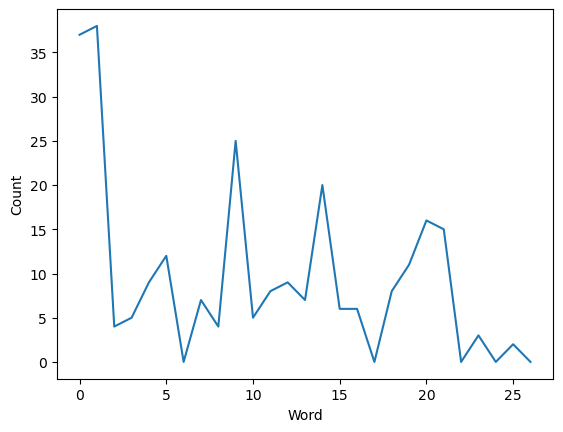

In [29]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data['clean_teks'][0])
X, tokenizer = tokenize_pad_sequences(data['clean_teks'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 kecewa mundur jam kbrgktan maskapai buruk pesan tiket undur undur jam mundurrrrrrrrrr jam burukkkkk sekaliiii kecewaaaaa berat maskapai citilink sgtt berhargaaaa kasihan orang tua jam mnngu bandara brgkt jam pagi kecewaaaaaaaa
After Tokenization & Padding 
 [  55  448   28 1021    5  150  159   22  729  729   28 1022   28 1023
 1024 1025  310    5    1 1026 1027 1028  191  378   28 1029   35 1030
   28   87 1031    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [34]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [36]:
y = pd.get_dummies(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (294, 50) (294, 2)
Validation Set -> (99, 50) (99, 2)
Test Set -> (99, 50) (99, 2)


In [37]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [39]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

ValueError: in user code:

    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 3) are incompatible
